In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2024-05-24 22:59:29.625323: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 22:59:30.306963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

def train_mlp(hidden_layers, neurons_per_layer, epochs=3):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        *[tf.keras.layers.Dense(neurons_per_layer, activation='relu') for _ in range(hidden_layers)],
        tf.keras.layers.Dense(10, activation='softmax')
    ])  
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return model, history

In [3]:
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Training MLP with 1 hidden layers and 64 neurons per layer:


/home/nexus/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-24 22:59:31.721962: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-24 22:59:31.765428: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skip

Epoch 1/3


2024-05-24 22:59:31.879847: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8567 - loss: 0.5070 - val_accuracy: 0.9482 - val_loss: 0.1717
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9549 - loss: 0.1535 - val_accuracy: 0.9640 - val_loss: 0.1224
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.9684 - loss: 0.1054 - val_accuracy: 0.9660 - val_loss: 0.1085
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9599 - loss: 0.1202
Test Accuracy: 0.9660


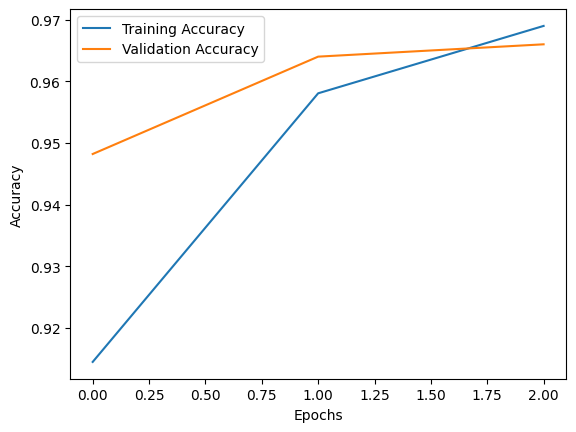

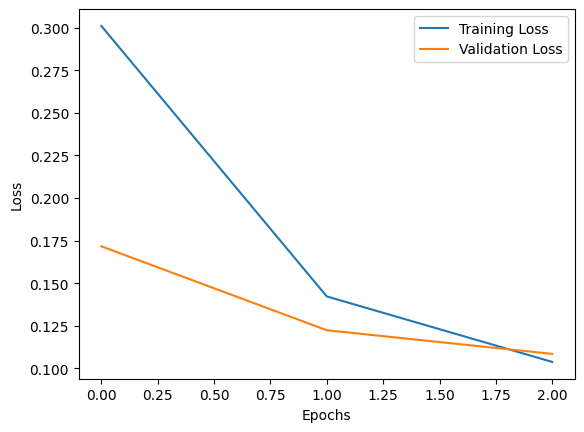


Training MLP with 2 hidden layers and 128 neurons per layer:
Epoch 1/3


2024-05-24 22:59:38.683099: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8816 - loss: 0.4042 - val_accuracy: 0.9604 - val_loss: 0.1237
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9689 - loss: 0.0995 - val_accuracy: 0.9727 - val_loss: 0.0822
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9789 - loss: 0.0662 - val_accuracy: 0.9771 - val_loss: 0.0762
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9734 - loss: 0.0884
Test Accuracy: 0.9771


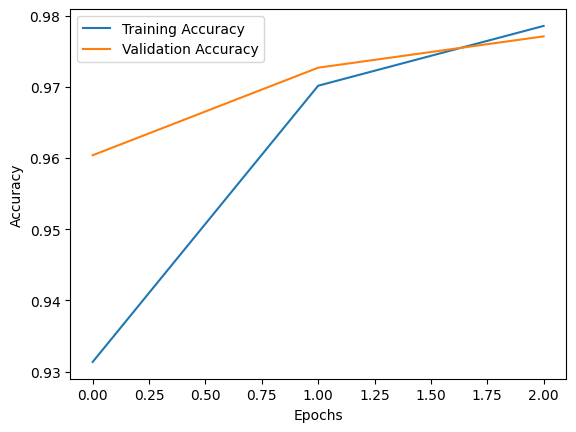

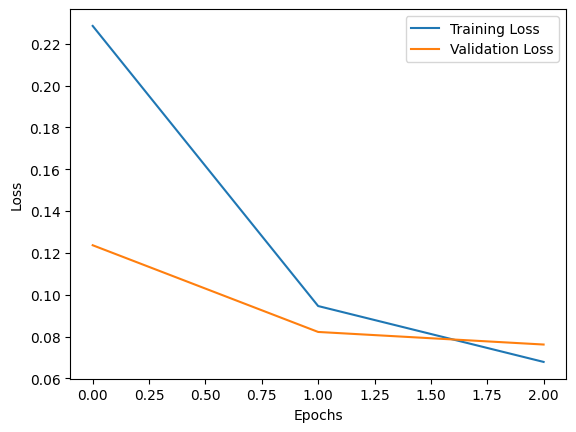

In [4]:
def main():
    model_configurations = [
        {'hidden_layers': 1, 'neurons_per_layer': 64},
        {'hidden_layers': 2, 'neurons_per_layer': 128},
    ]

    for config in model_configurations:
        print(f"\nTraining MLP with {config['hidden_layers']} hidden layers and {config['neurons_per_layer']} neurons per layer:")
        model, history = train_mlp(config['hidden_layers'], config['neurons_per_layer'])
        test_loss, test_accuracy = model.evaluate(test_images, test_labels)
        print(f'Test Accuracy: {test_accuracy:.4f}')
        plot_training_history(history)

if __name__ == "__main__":
    main()
